In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
5,2020-03-30,France,43022.0,40174.0,2715.0,2606.0,2848.0,109.0
6,2020-03-30,China,82601.0,82463.0,3308.0,3311.0,138.0,-3.0
7,2020-03-30,Italy,99266.0,97689.0,11095.0,10781.0,1577.0,314.0
8,2020-03-30,Spain,81599.0,78797.0,6594.0,6528.0,2802.0,66.0
9,2020-03-30,United States,148230.0,143025.0,2840.0,2509.0,5205.0,331.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3214.074468085106
RMSE =  6426.821347109282


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  431.2340425531915
RMSE =  878.4006864509196


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f1 = plt.figure(figsize=(20,10))
    ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
    ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  12739.952380952382
RMSE =  14930.141853375164
-- World performances for deaths --
MAPE =  1686.1904761904761
RMSE =  2086.527440966153


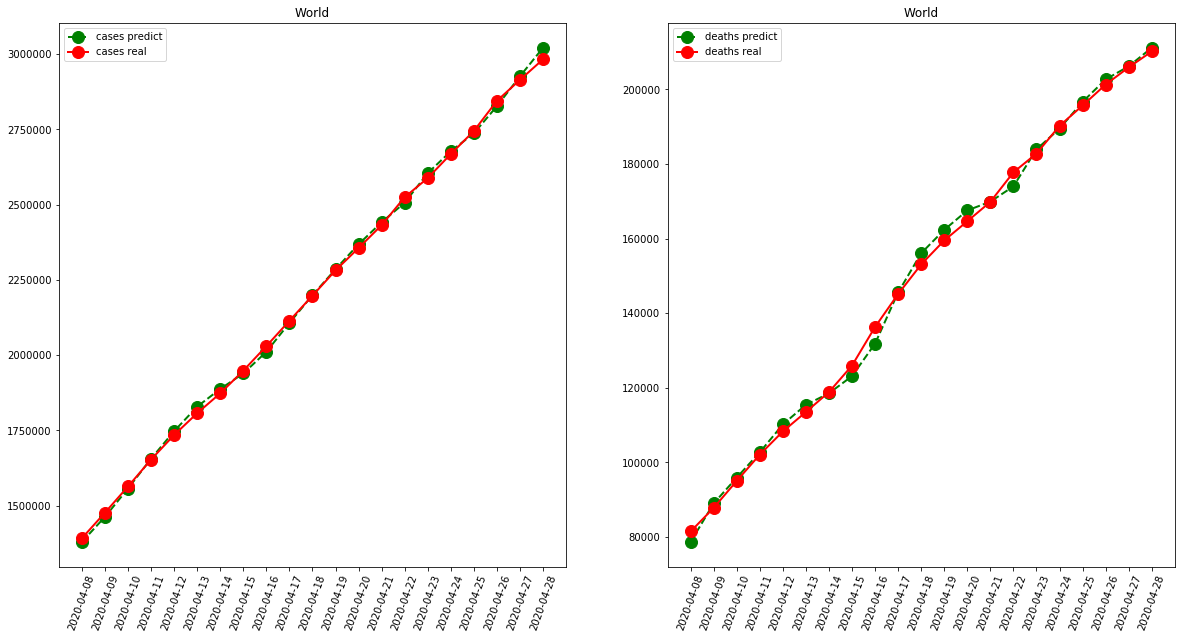

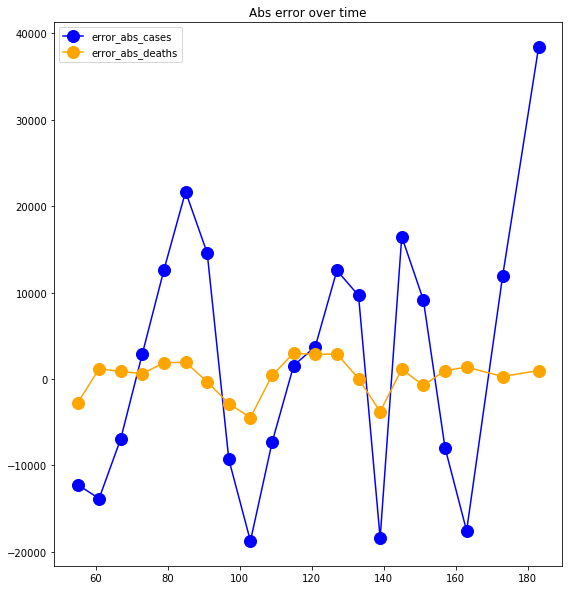

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  1632.4193548387098
RMSE =  2218.0074536655934
-- France performances for deaths --
MAPE =  416.741935483871
RMSE =  577.590741369812


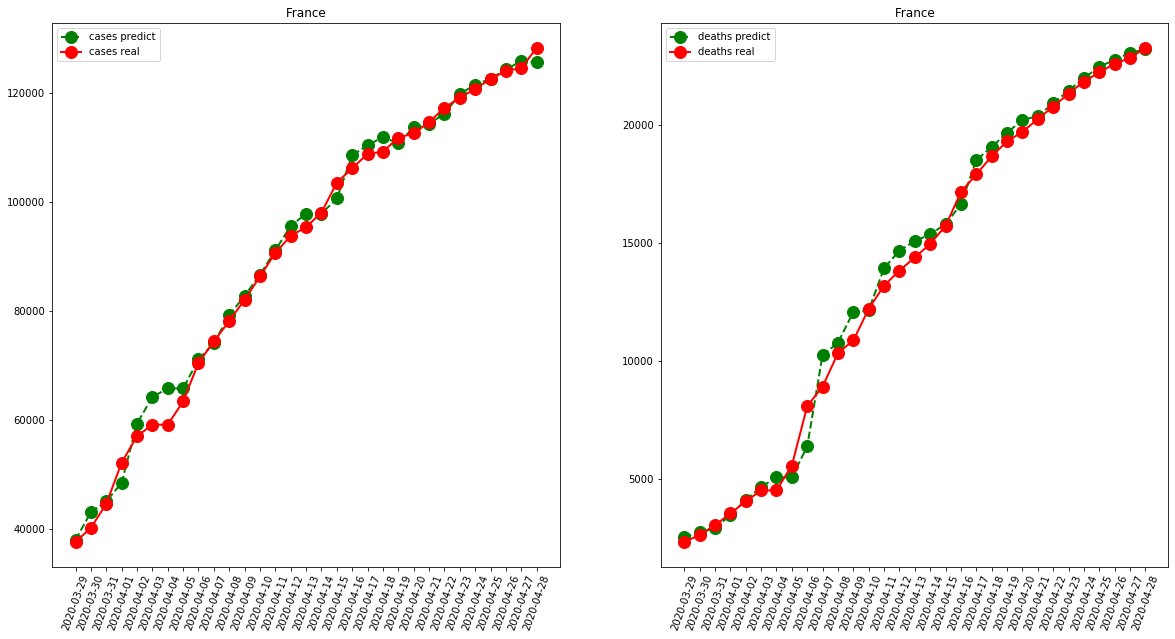

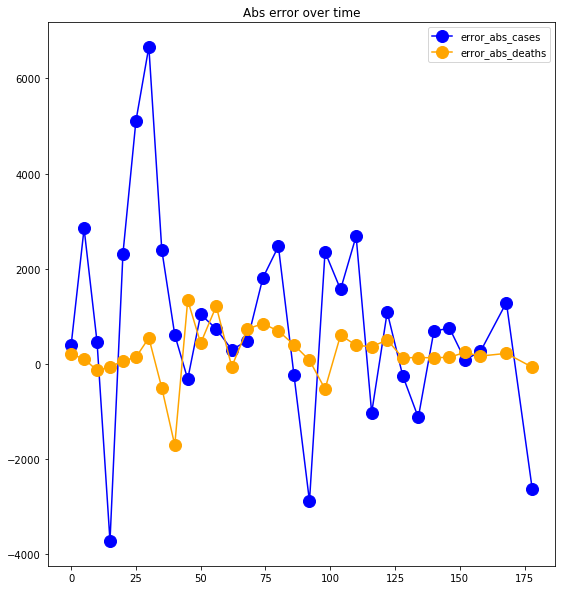

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  721.6129032258065
RMSE =  891.2561631692073
-- Italy performances for deaths --
MAPE =  81.74193548387096
RMSE =  109.05695463765119


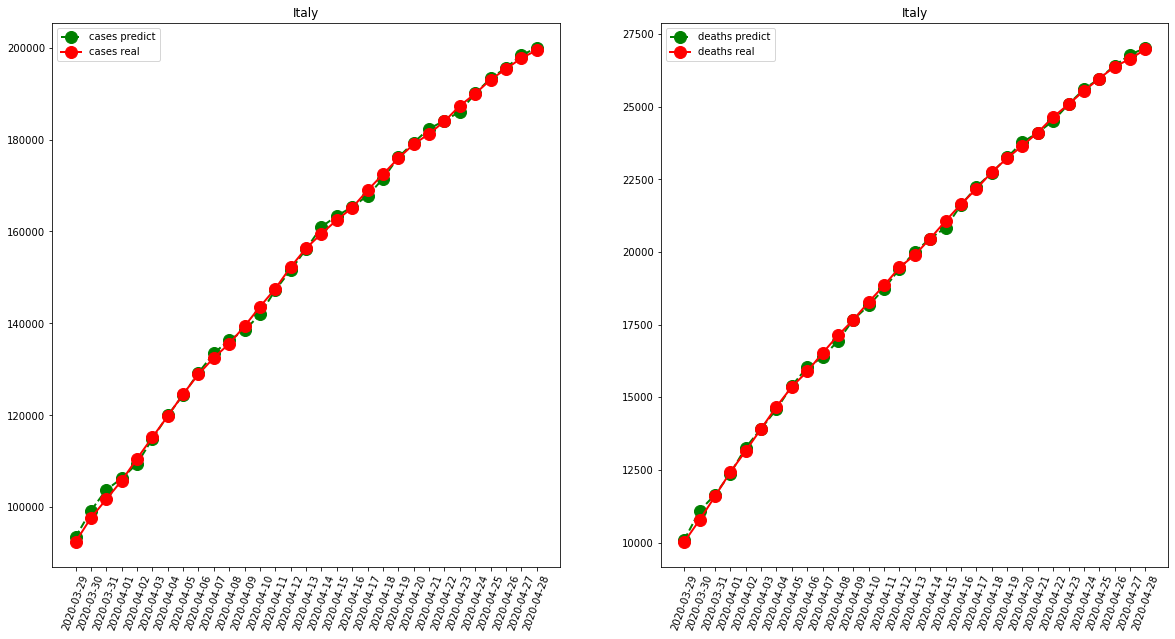

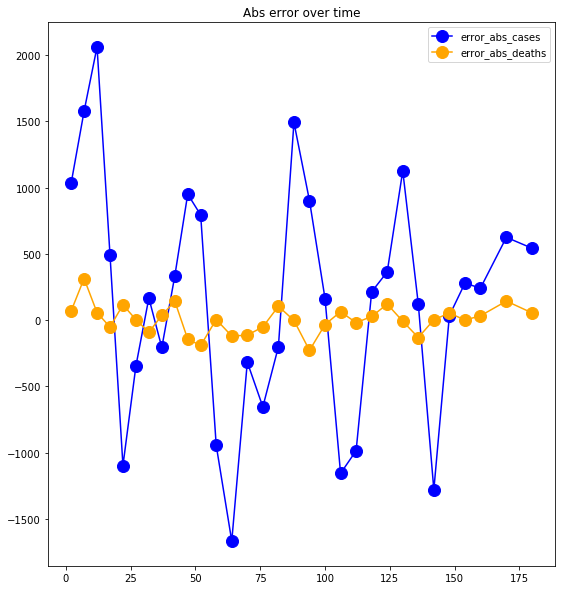

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  1920.6451612903227
RMSE =  3573.8263582202308
-- Spain performances for deaths --
MAPE =  128.09677419354838
RMSE =  156.48714262344882


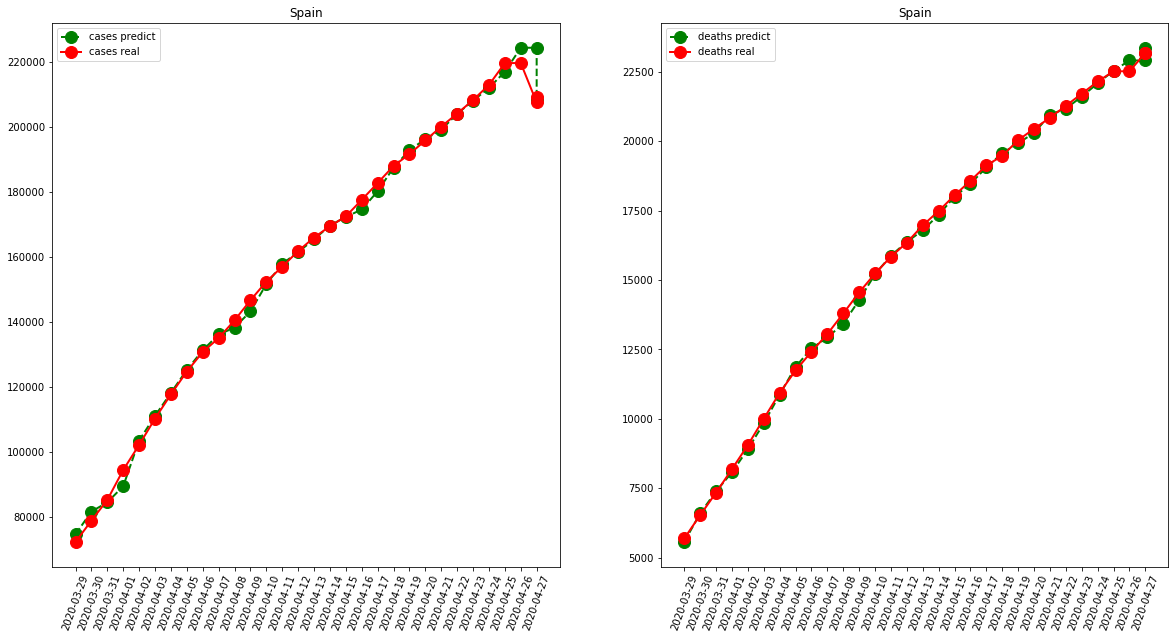

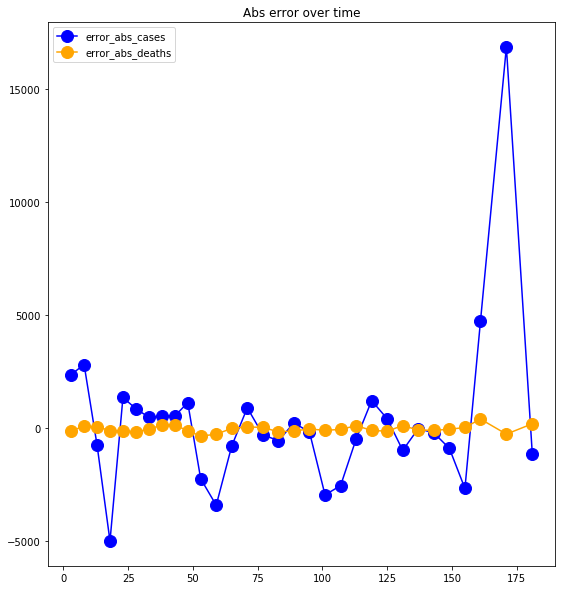

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  6325.419354838709
RMSE =  8994.900404691682
-- United States performances for deaths --
MAPE =  729.4193548387096
RMSE =  1128.403439635242


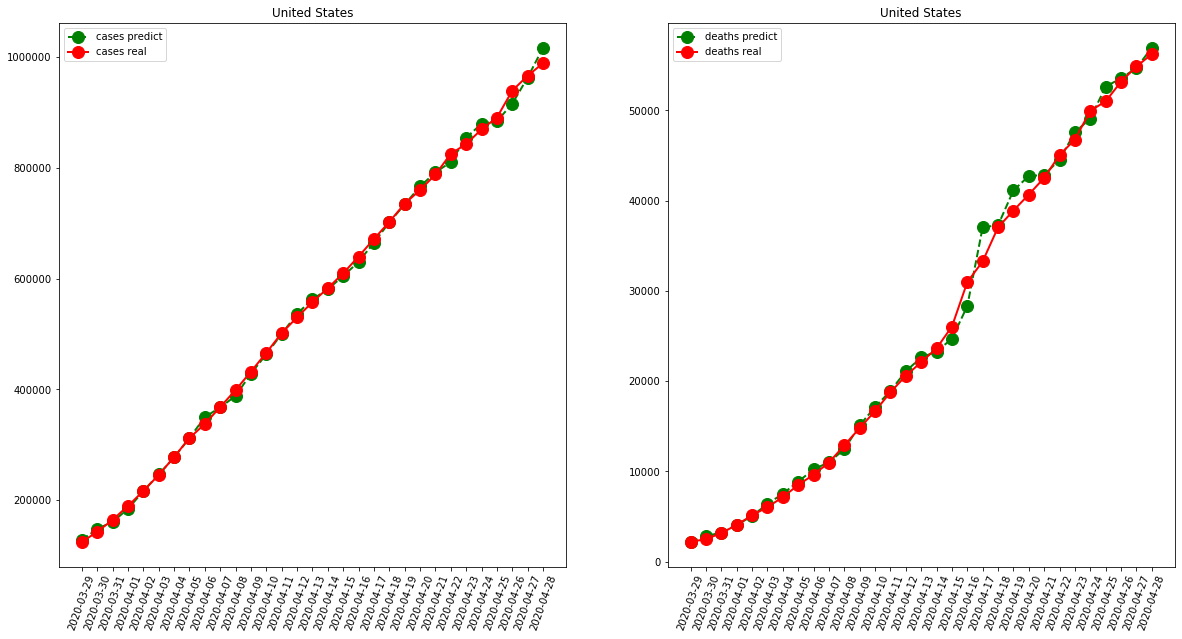

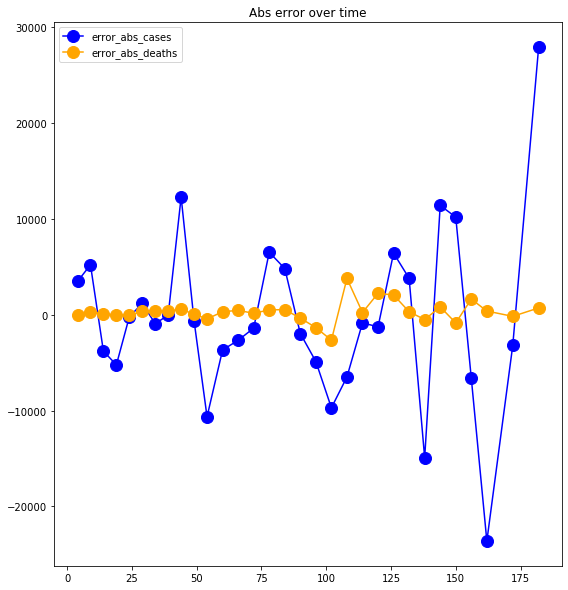

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  159.80645161290323
RMSE =  191.3650455155311
-- China performances for deaths --
MAPE =  86.38709677419355
RMSE =  280.59453010096377


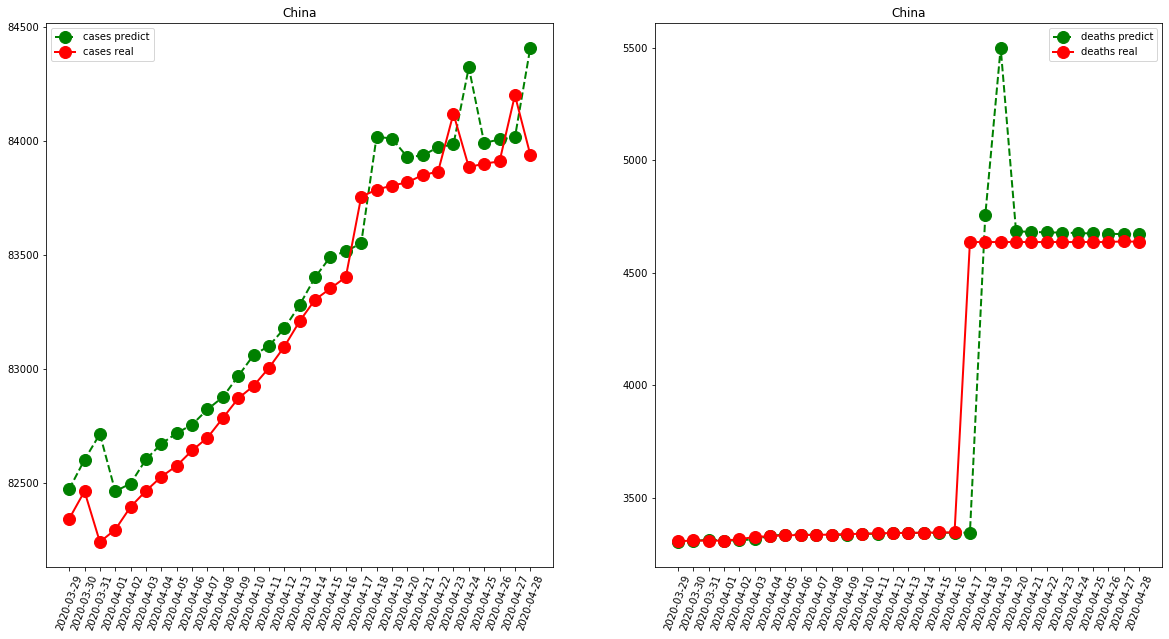

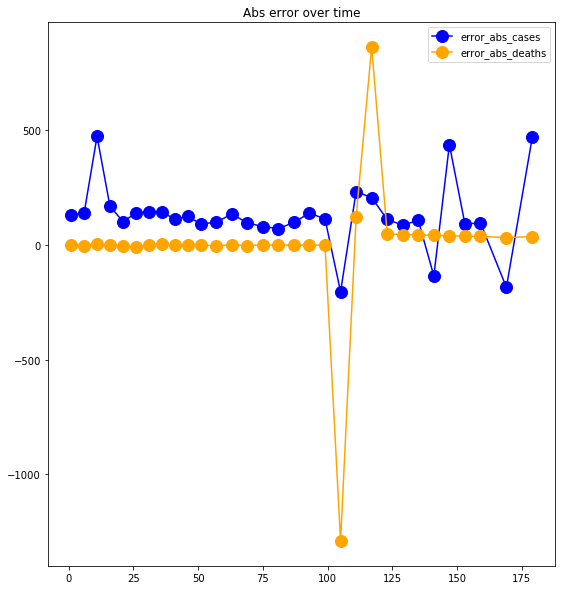

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  454.6666666666667
RMSE =  573.0735845712428
-- United Kingdom performances for deaths --
MAPE =  270.0
RMSE =  286.3540931550773


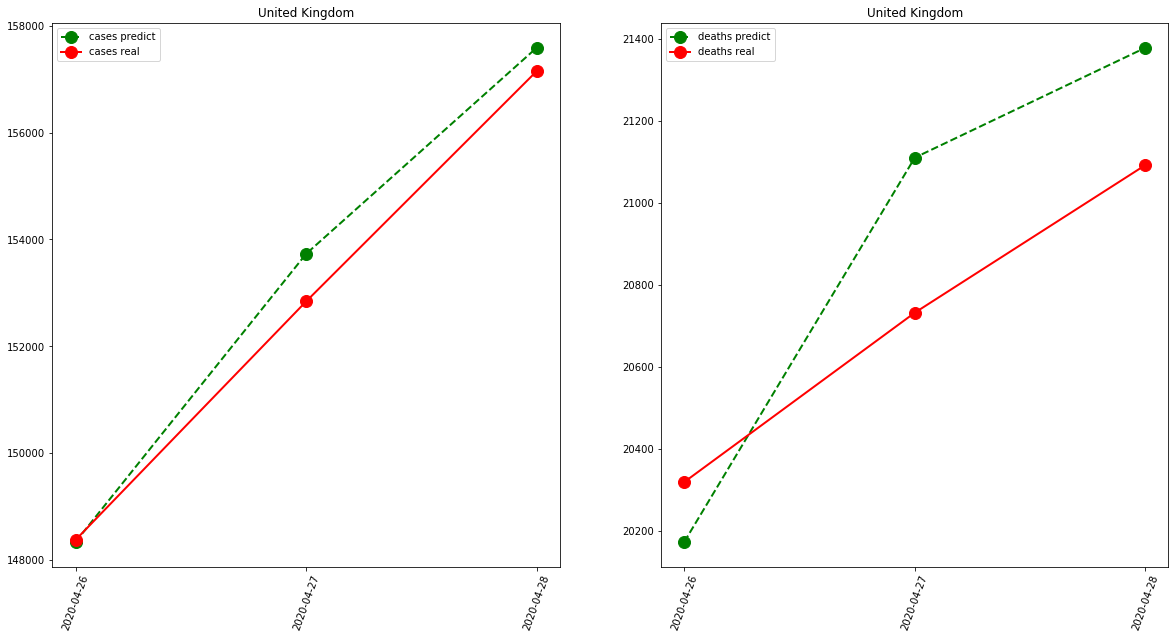

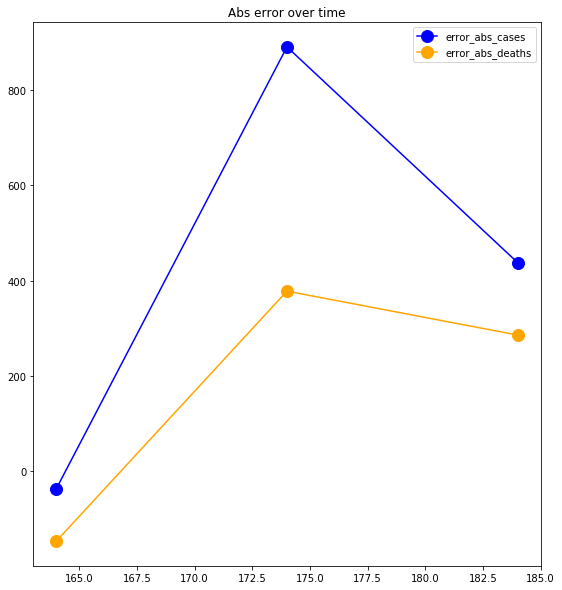

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  357.3333333333333
RMSE =  435.531093417374
-- Germany performances for deaths --
MAPE =  21.333333333333332
RMSE =  29.97776954122282


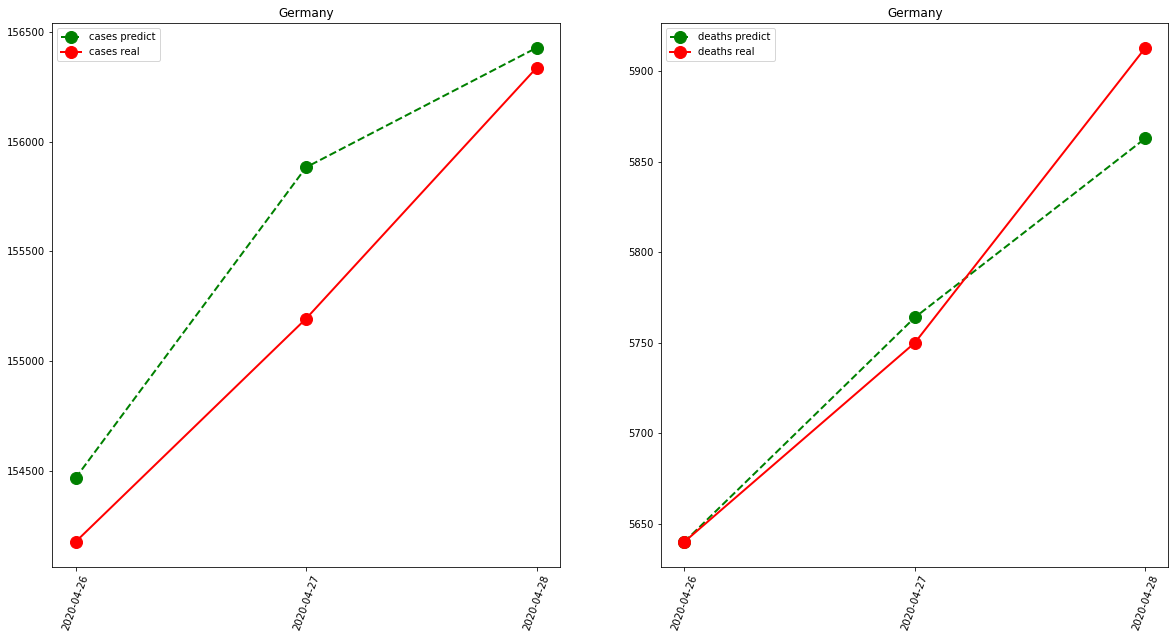

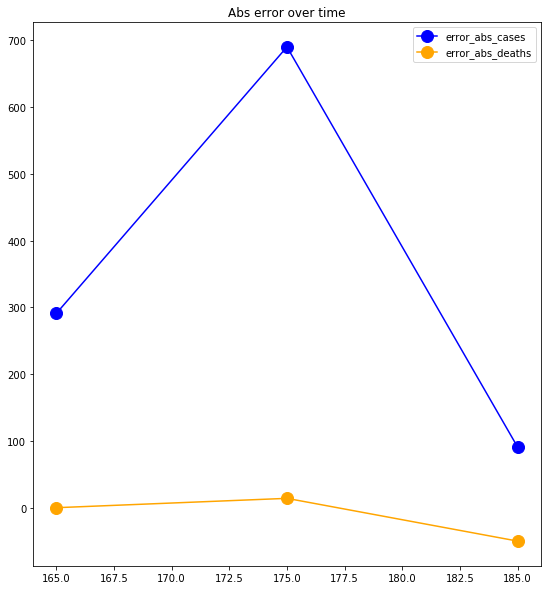

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  75.0
RMSE =  93.04658331538384
-- Iran performances for deaths --
MAPE =  22.333333333333332
RMSE =  23.302360395462088


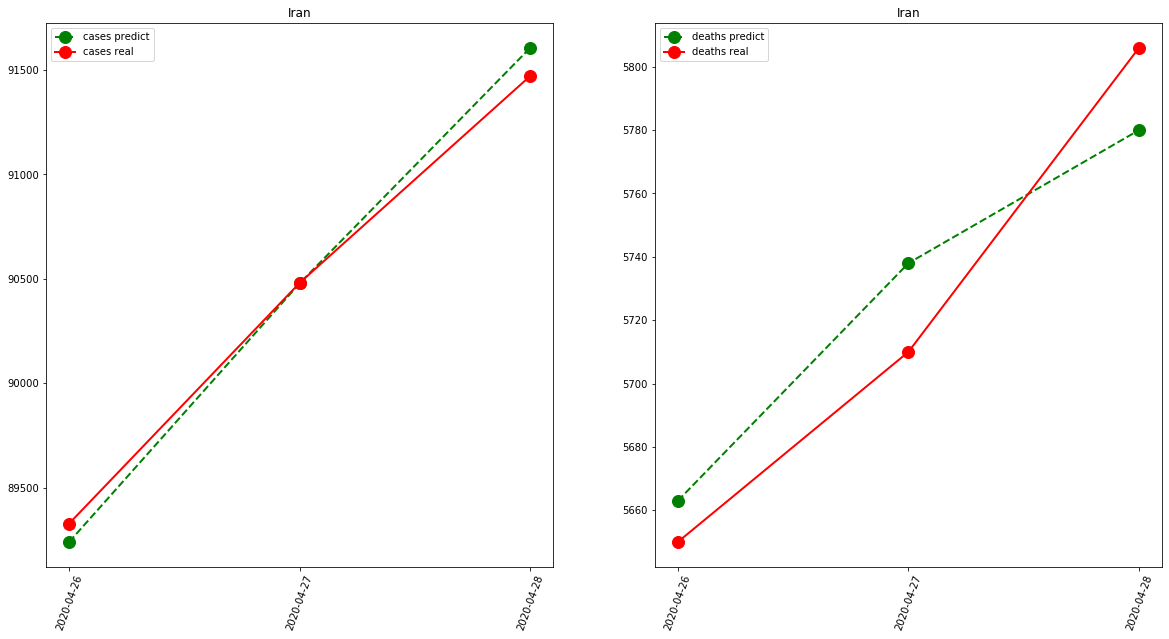

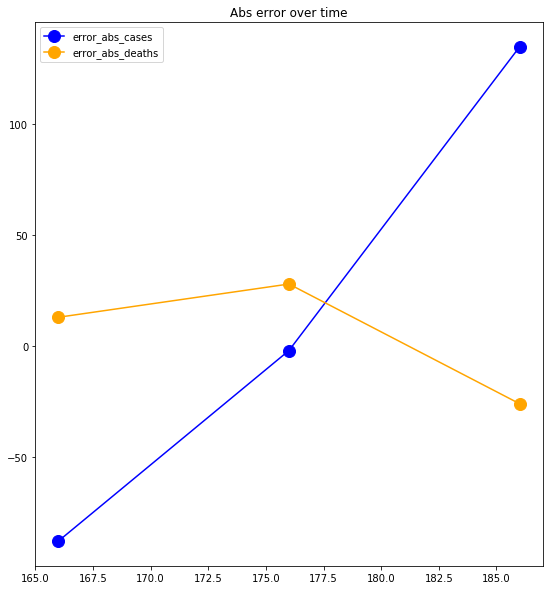

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  163.0
RMSE =  204.5523567859013
-- Turkey performances for deaths --
MAPE =  2.3333333333333335
RMSE =  2.3804761428476167


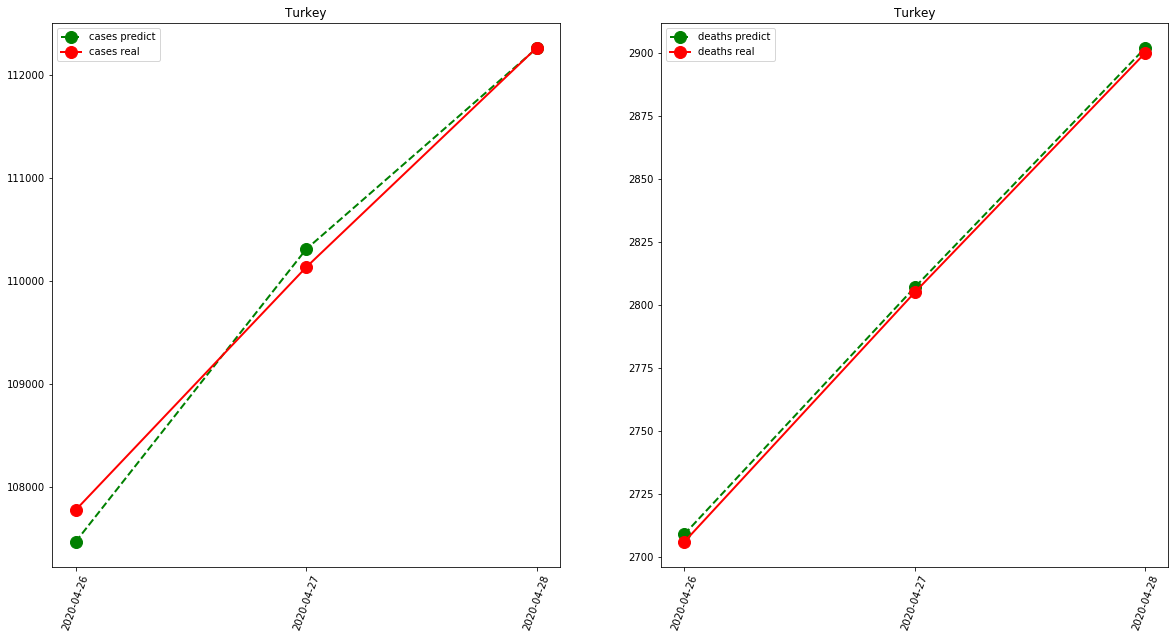

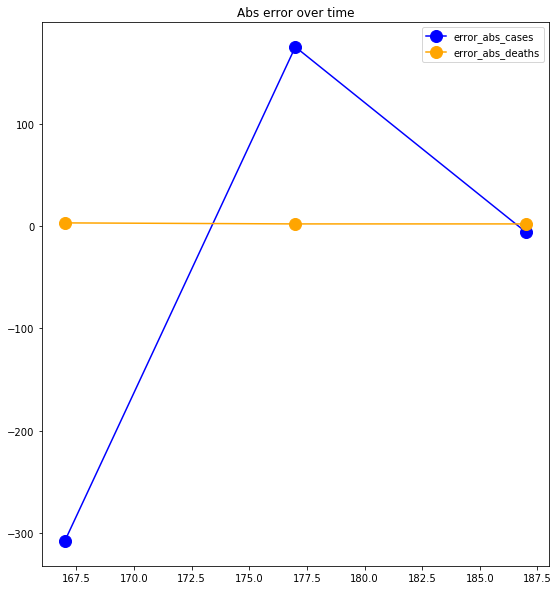

In [16]:
visShow("Turkey")

In [17]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)